In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import nan
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mlxtend.plotting import category_scatter

In [39]:
Data = pd.read_csv("E:/ML/Data/time_series_covid19_confirmed_global.csv")

In [40]:
pd.set_option('display.max_columns', None)
Data.head(15)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,NaN,Argentina,-38.4161,-63.6167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329,353,356,363,373,382,393,403,416,433,445,452,467,484,500,508,520,528,539,556,569,583,608,632,648,664,693,717,735,765,785,815
7,NaN,Armenia,40.0691,45.0382,0,0,0,0,0,0,0,0,0,0

In [41]:
Data.shape

(266, 148)

In [42]:
#Drop row that doesn't have confirmed case in whole recorded time preiod
last_day = Data.T.tail(1)
for i in range(len(Data)):
    if int(last_day[i]) == 0:
        print(i)
        Data = Data.drop(i)

10
25
33
37
43
65
69
70
71
75
78
92
93
101
105
108
111
113
127
161
164
179
189
190
195
214
220
228
232
233
236
238
243
244
245
248
255
257
258
265


In [43]:
Data.index = range(len(Data.index))  

In [44]:
Data['Province/State'] = ['PS{}'.format(i) for i in range(len(Data))]

In [45]:
data_cases = Data[Data.columns[4:]]
data_cases.head(15)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120,122,127,132,136,153,168,169,173,178,187,193,205,216,218,219,220,227,235,246,249,257,265,270,294,300,309,327,357,369,384,405,426,446,451
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,33,33,33,33,33,33,33,33,33,33,33,34,34,34,34,34,35,36,36
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502,507,515,522,529,536,542,548,555,561,568,575,582,592,600,609,617,623,630,638,646,653,661,667,673,681,690,698,707,715,724,732,741,751,760
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48,48,48,49,49,49,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,6
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18,19,23,27,28,36,39,43,44,48,56,63,72,82,83,90,97,102,111,115,123,129,132,136,147,152,165,176,185,192,197,207,214,218,225,237,246,260,264,273,282,293,300,305,314,319,329,353,356,363,373,382,393,403,416,433,445,452,467,484,500,508,520,528,539,556,569,583,608,632,648,664,693,717,735,765,785,815
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,4,7,7,7,7,8,8,9,10,12,13,13,14,16,17,18,19,20,20,22,24,24,24,27,28,28,29,30,30,32,33,33,35,39,40,40,42,43,44,45,46,47,48,49,52,55,60,61,64,67,70,74,77,81,87,91,9

In [47]:
# Get a dataframe that contains new cases each day
def get_list(x):
    
    for i in range(len(x)):
        if x[i] == 0:
            continue
        else:
            j=i
            break
    
    add=[x[j] for j in range(j, len(x))]
    return add

In [48]:
new_data = pd.DataFrame()

In [49]:
for i in range(len(data_cases)):
    temp_list = get_list(data_cases.loc[i])
    new_data = new_data.append(pd.Series(temp_list), ignore_index = True)

In [50]:
new_data.columns = [str(i+1) for i in range(144)]

In [51]:
new_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,7.0,7.0,11.0,14.0,14.0,15.0,15.0,18.0,18.0,21.0,23.0,25.0,30.0,30.0,30.0,33.0,36.0,36.0,40.0,42.0,43.0,47.0,50.0,57.0,58.0,60.0,64.0,68.0,72.0,85.0,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,132.0,136.0,153.0,168.0,169.0,173.0,178.0,187.0,193.0,205.0,216.0,218.0,219.0,220.0,227.0,235.0,246.0,249.0,257.0,265.0,270.0,294.0,300.0,309.0,327.0,357.0,369.0,384.0,405.0,426.0,446.0,451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,5.0,5.0,6.0,8.0,10.0,10.0,11.0,15.0,15.0,16.0,17.0,20.0,20.0,21.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,24.0,25.0,26.0,26.0,26.0,26.0,26.0,26.0,27.0,27.0,27.0,27.0,28.0,28.0,30.0,30.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,32.0,32.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,33.0,34.0,34.0,34.0,34.0,34.0,35.0,36.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,3.0,4.0,4.0,4.0,7.0,9.0,11.0,15.0,17.0,17.0,19.0,21.0,25.0,26.0,29.0,31.0,35.0,44.0,58.0,86.0,105.0,130.0,152.0,173.0,193.0,205.0,235.0,256.0,275.0,293.0,313.0,326.0,336.0,348.0,364.0,367.0,375.0,384.0,392.0,402.0,407.0,415.0,419.0,425.0,432.0,437.0,444.0,450.0,453.0,459.0,463.0,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,522.0,529.0,536.0,542.0,548.0,555.0,561.0,568.0,575.0,582.0,592.0,600.0,609.0,617.0,623.0,630.0,638.0,646.0,653.0,661.0,667.0,673.0,681.0,690.0,698.0,707.0,715.0,724.0,732.0,741.0,751.0,760.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,3.0,3.0,3.0,6.0,8.0,12.0,14.0,15.0,16.0,17.0,18.0,21.0,22.0,23.0,25.0,26.0,26.0,29.0,29.0,31.0,33.0,33.0,35.0,35.0,36.0,37.0,37.0,37.0,37.0,40.0,40.0,40.0,40.0,41.0,42.0,42.0,43.0,44.0,45.0,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,49.0,49.0,49.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
data = pd.concat([Data[Data.columns[:4]],new_data], axis = 1)

In [53]:
new_data = pd.melt(data, id_vars = list(data.columns[:4]), value_vars = 
       list(data.columns[4:]), var_name = "NthDay", value_name = "Cases")

In [54]:
new_data

,Province/State,Country/Region,Lat,Long,NthDay,Cases
0,PS0,Afghanistan,33.000000,65.000000,1,1.0
1,PS1,Albania,41.153300,20.168300,1,1.0
2,PS2,Algeria,28.033900,1.659600,1,1.0
3,PS3,Andorra,42.506300,1.521800,1,1.0
4,PS4,Angola,-11.202700,17.873900,1,2.0
...,...,...,...,...,...,...
32539,PS221,Western Sahara,24.215500,-12.885800,144,NaN
32540,PS222,Sao Tome and Principe,0.186360,6.613081,144,NaN
32541,PS223,Yemen,15.552727,48.516388,144,NaN
32542,PS224,Comoros,-11.645500,43.333300,144,NaN


In [55]:
new_data = new_data[new_data.Cases.notnull()]

In [56]:
new_data

,Province/State,Country/Region,Lat,Long,NthDay,Cases
0,PS0,Afghanistan,33.0000,65.0000,1,1.0
1,PS1,Albania,41.1533,20.1683,1,1.0
2,PS2,Algeria,28.0339,1.6596,1,1.0
3,PS3,Andorra,42.5063,1.5218,1,1.0
4,PS4,Angola,-11.2027,17.8739,1,2.0
...,...,...,...,...,...,...
31920,PS54,China,47.8620,127.7615,142,13.0
31923,PS57,China,30.9756,112.2707,142,4512.0
32145,PS53,China,39.5490,116.1306,143,6.0
32149,PS57,China,30.9756,112.2707,143,4512.0


In [57]:
new_data.describe()

,Lat,Long,Cases
count,19335.000000,19335.000000,19335.000000
mean,23.712297,28.594570,1012.044582
std,23.646406,68.858773,5967.663239
min,-41.454500,-123.120700,0.000000
25%,9.945600,-5.547100,3.000000
50%,26.815400,22.937500,10.000000
75%,41.608600,101.058300,81.000000
max,64.963100,174.886000,115436.000000


In [58]:
New_data = new_data

In [59]:
PData = pd.read_csv("E:/ML/novel-corona-virus-2019-dataset/Population Density.csv", encoding= 'unicode_escape')

In [60]:
Combined_data = New_data.join(PData.set_index('Country/Region'), on='Country/Region')

In [61]:
AData = pd.read_csv("E:/ML/novel-corona-virus-2019-dataset/Age.csv", encoding= 'unicode_escape').filter(['Country/Region','Age70+'], axis =1)

In [62]:
Combined_data = Combined_data.join(AData.set_index('Country/Region'), on='Country/Region')

In [63]:
BData = pd.read_csv("E:/ML/novel-corona-virus-2019-dataset/Hospital_bed_latest.csv")

In [64]:
Combined_data = Combined_data.join(BData.set_index('Country/Region'), on='Country/Region')

In [65]:
GData = pd.read_csv("E:/ML/novel-corona-virus-2019-dataset/GDP.csv")

In [66]:
Combined_data = Combined_data.join(GData.set_index('Country/Region'), on='Country/Region')

In [67]:
TPData = pd.read_csv("E:/ML/novel-corona-virus-2019-dataset/World Population.csv")

In [68]:
Combined_data = Combined_data.join(TPData.set_index('Country/Region'), on='Country/Region')

In [69]:
Combined_data

,Province/State,Country/Region,Lat,Long,NthDay,Cases,Population Density,Age70+,HospitalBeds,GDP,PopTotal
0,PS0,Afghanistan,33.0000,65.0000,1,1.0,59.6,1.482145,0.5,520.896603,38041.76
1,PS1,Albania,41.1533,20.1683,1,1.0,105.0,9.439646,2.9,5268.848504,2880.91
2,PS2,Algeria,28.0339,1.6596,1,1.0,18.4,4.035233,1.9,4114.715061,43053.05
3,PS3,Andorra,42.5063,1.5218,1,1.0,164.4,NaN,2.5,42029.762740,77.15
4,PS4,Angola,-11.2027,17.8739,1,2.0,26.4,1.284318,0.8,3432.385736,31825.30
...,...,...,...,...,...,...,...,...,...,...,...
31920,PS54,China,47.8620,127.7615,142,13.0,153.3,6.489206,4.2,9770.847088,1433783.69
31923,PS57,China,30.9756,112.2707,142,4512.0,153.3,6.489206,4.2,9770.847088,1433783.69
32145,PS53,China,39.5490,116.1306,143,6.0,153.3,6.489206,4.2,9770.847088,1433783.69
32149,PS57,China,30.9756,112.2707,143,4512.0,153.3,6.489206,4.2,9770.847088,1433783.69


In [70]:
Combined_data['CasePC'] = Combined_data['Cases']/Combined_data['PopTotal']*1000

In [71]:
Combined_data.head (30)

,Province/State,Country/Region,Lat,Long,NthDay,Cases,Population Density,Age70+,HospitalBeds,GDP,PopTotal,CasePC
0,PS0,Afghanistan,33.0000,65.0000,1,1.0,59.6,1.482145,0.5,520.896603,38041.76,0.026287
1,PS1,Albania,41.1533,20.1683,1,1.0,105.0,9.439646,2.9,5268.848504,2880.91,0.347113
2,PS2,Algeria,28.0339,1.6596,1,1.0,18.4,4.035233,1.9,4114.715061,43053.05,0.023227
3,PS3,Andorra,42.5063,1.5218,1,1.0,164.4,NaN,2.5,42029.762740,77.15,12.961763
4,PS4,Angola,-11.2027,17.8739,1,2.0,26.4,1.284318,0.8,3432.385736,31825.30,0.062843
5,PS5,Antigua and Barbuda,17.0608,-61.7964,1,1.0,222.6,5.720023,3.8,16726.980810,97.12,10.296540
6,PS6,Argentina,-38.4161,-63.6167,1,1.0,16.5,7.626799,5.0,11683.949620,44780.68,0.022331
7,PS7,Armenia,40.0691,45.0382,1,1.0,104.1,7.348681,4.2,4212.070943,2957.73,0.338097
8,PS8,Australia,-35.4735,149.0124,1,1.0,3.3,11.103546,3.8,57373.686680,25203.20,0.039678
9,PS9,Australia,-33.8688,151.2093,1,1.0,3.3,11.103546,3.8,57373.686680,25203.20,0.039678


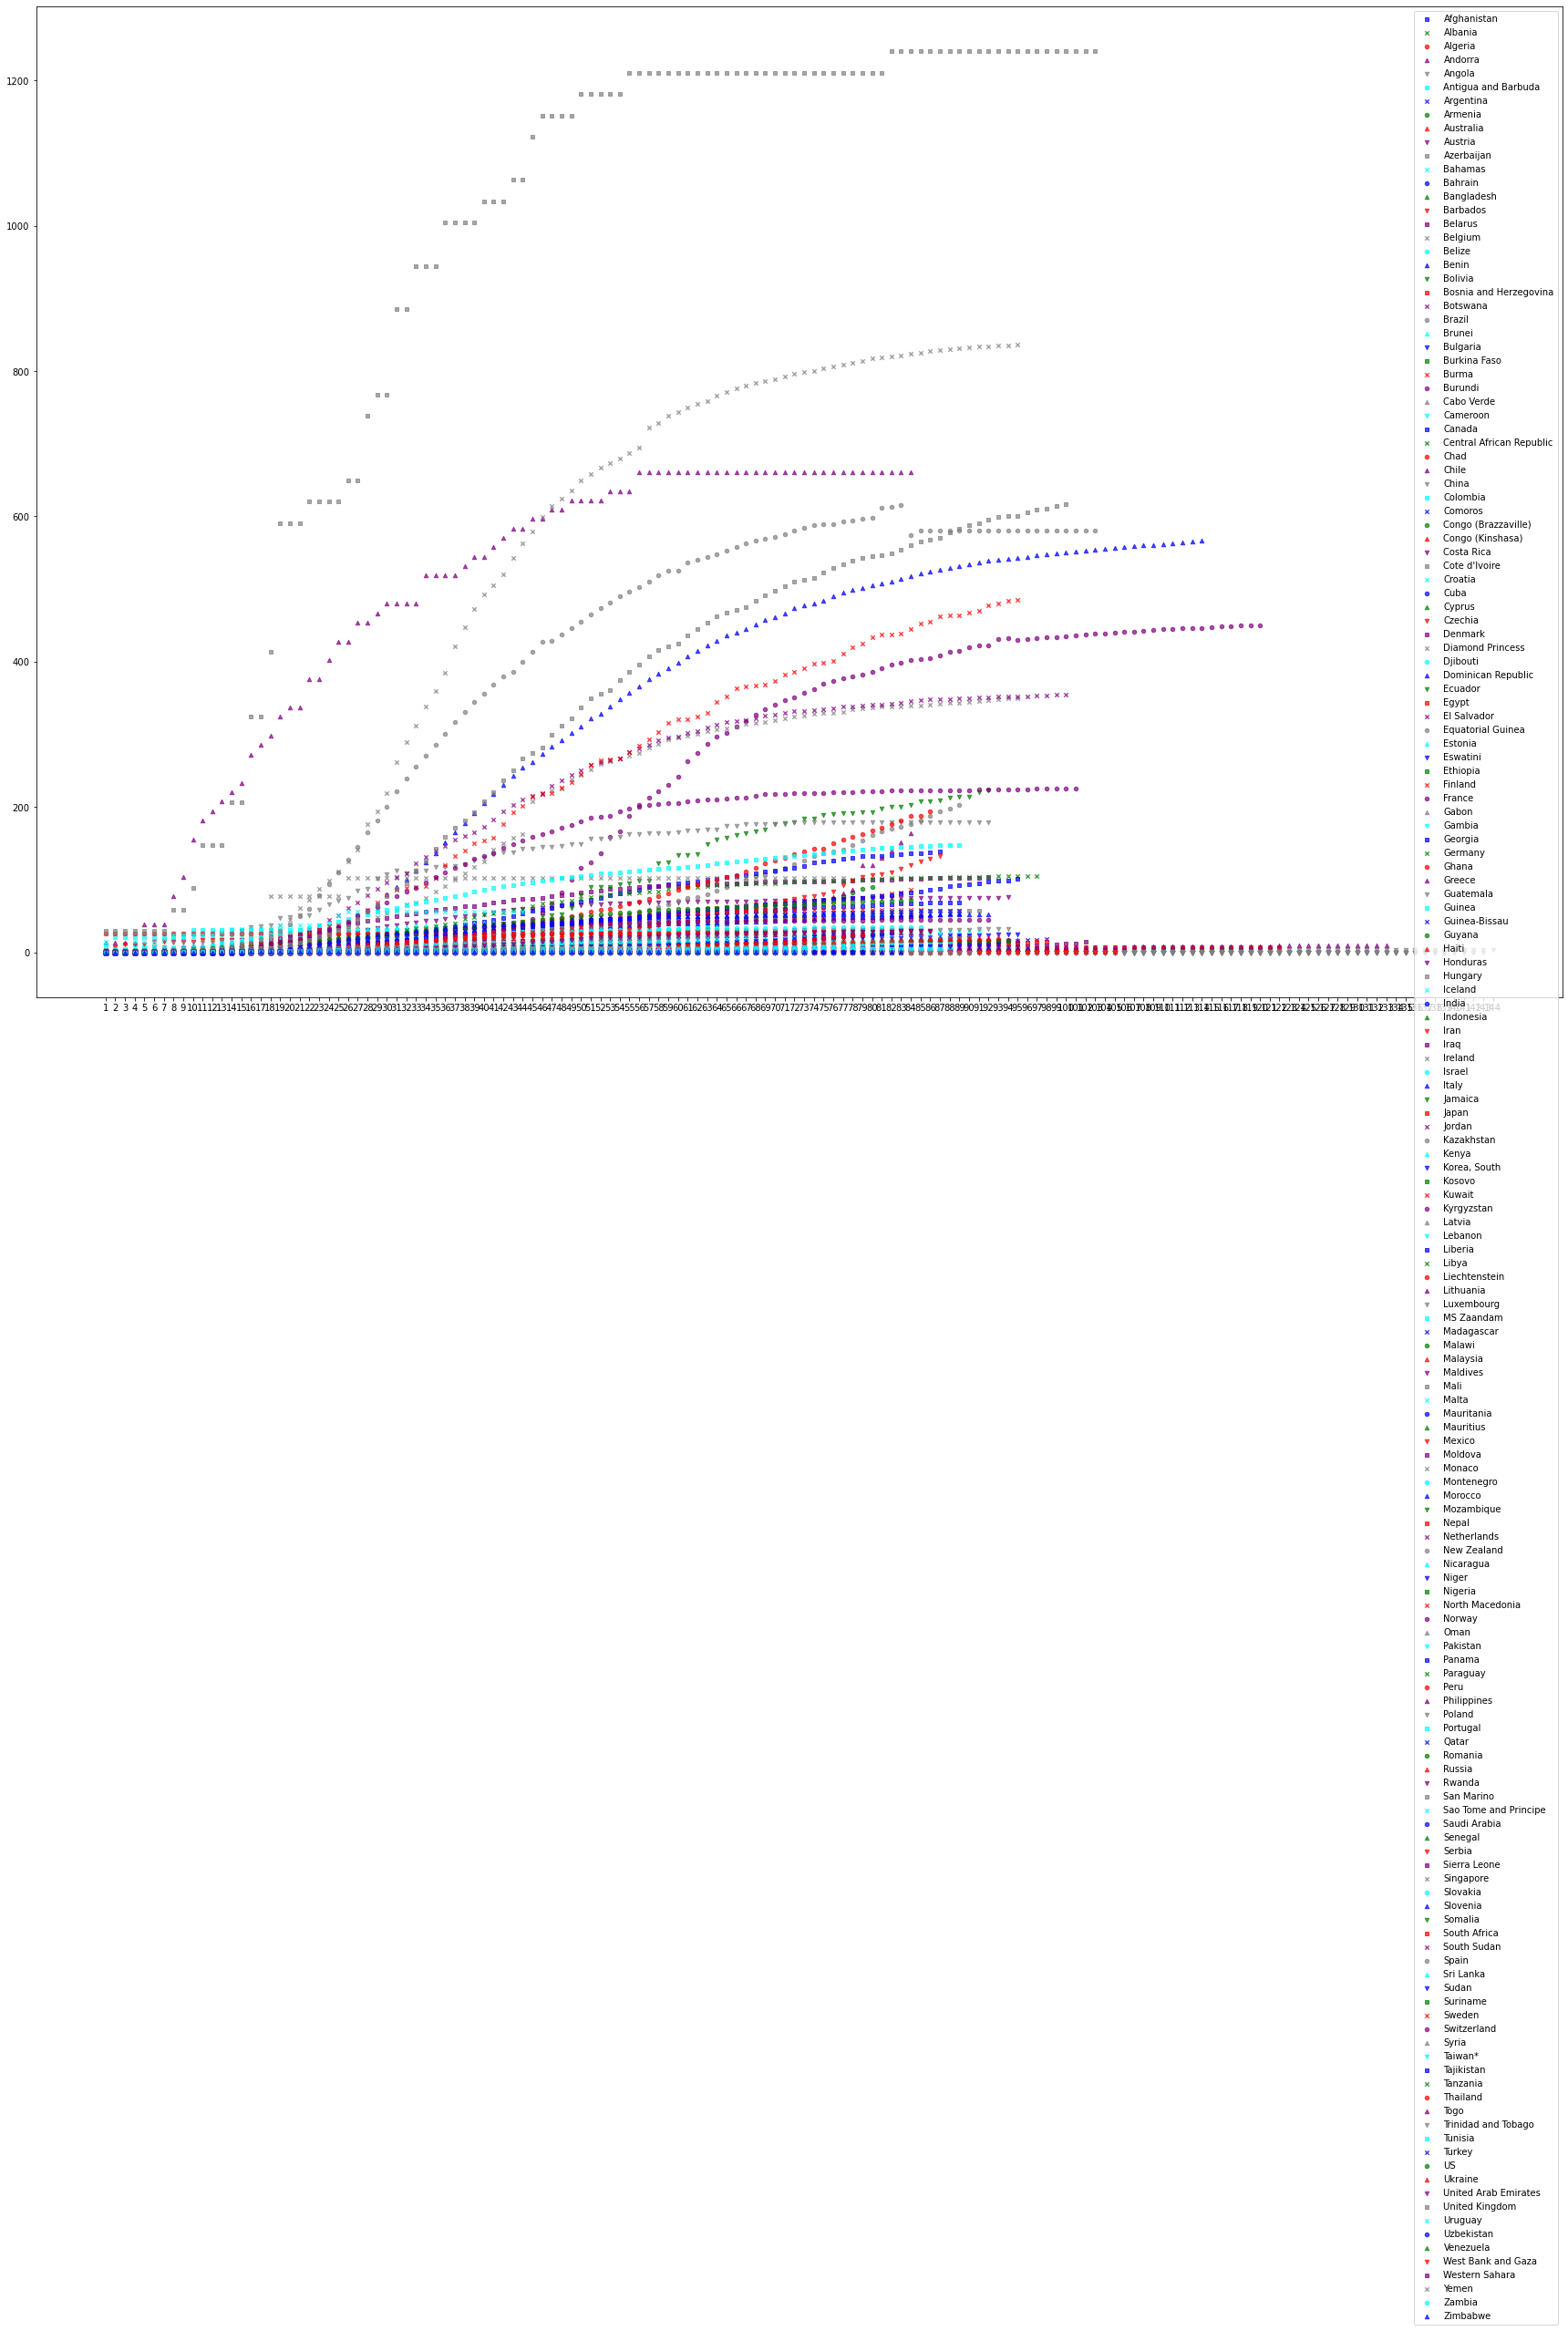

In [72]:
fig = category_scatter(x='NthDay', y='CasePC', label_col='Country/Region', 
                       data = Combined_data)
fig.set_size_inches(30, 20)

In [73]:
Combined_data = Combined_data.drop(['Lat', 'Long','Country/Region','Cases','PopTotal'], axis = 1)

In [76]:
Combined_data.to_csv('E:/ML/novel-corona-virus-2019-dataset/Converted/new_data3.csv', index = False)